Import the Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Load the Dataset


In [2]:
df = pd.read_csv("data.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1555,1556,15709994,Gallo,658,France,Female,40,7,140596.95,1,0,1,135459.02,1
9280,9281,15614847,Townsend,674,France,Female,45,6,72494.69,1,0,1,140041.78,0
7325,7326,15787229,Samsonova,761,Spain,Female,34,2,0.00,2,1,0,61251.25,0
8145,8146,15708904,Yermakova,850,France,Female,37,9,0.00,1,0,0,100101.06,0
9374,9375,15632538,Watson,658,Spain,Female,32,5,145553.07,1,1,1,31484.76,0


Drop redundant columns from the dataset

In [5]:
df.drop('CustomerId',axis='columns',inplace=True)

In [6]:
df.drop('Surname',axis='columns',inplace=True)

In [8]:
df.drop('RowNumber',axis='columns',inplace=True)

KeyError: ignored

In [9]:
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4476,778,France,Male,33,1,0.00,2,1,0,85439.73,0
6840,563,France,Male,30,7,90727.79,1,1,0,122268.75,0
2205,509,Spain,Male,38,2,0.00,1,0,0,168460.12,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
pd.to_numeric(df.EstimatedSalary)

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [15]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

A Method to print unique column values for those elements whose datatype is object

In [16]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [17]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [18]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7562,685,France,Male,33,6,0.00,1,1,0,58458.26,0
8865,668,France,Male,72,2,0.00,2,1,1,70783.61,0
4144,655,France,Male,44,8,87471.63,1,0,1,188593.98,0
4262,515,France,Male,41,8,0.00,2,1,1,185054.14,0
9625,504,Germany,Female,44,0,131873.07,2,1,1,158036.72,1


Convert Geography of 3 types (France, germany and spain) into 1 hot encoding

In [19]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [20]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8901,586,Male,51,2,138553.57,1,1,1,92406.22,0,1,0,0
6615,661,Male,26,8,0.00,2,0,0,196875.87,0,1,0,0
1381,846,Female,41,5,0.00,3,1,0,3440.47,1,1,0,0
8817,558,Male,40,4,161766.87,1,0,0,92378.54,0,0,0,1
4563,705,Female,64,3,153469.26,3,0,0,146573.66,1,0,1,0


Convert Gender to 1 (Female) and 0 (Male) 

In [22]:
df1['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [23]:
df1.shape

(10000, 13)

In [24]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [28]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1900,570,1,33,8,0.0,1,1,1,124641.42,0,1,0,0
7391,430,0,31,5,0.0,1,1,0,95655.16,0,1,0,0
762,663,1,36,6,77253.5,1,0,0,35817.97,1,0,1,0
9369,718,1,39,2,0.0,1,1,1,52138.49,0,0,0,1
3843,783,0,38,1,0.0,3,1,1,80178.54,1,0,0,1


Scale the Columns

In [29]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

Do Train Test Split of the Dataset


In [30]:
X = df1.drop('Exited', axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [31]:
X_train.shape

(8000, 12)

Build The Neural Network Model With 1 Hidden Layer

In [32]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.7832
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.7977
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4544 - accuracy: 0.8035
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8066
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4279 - accuracy: 0.8159
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8173
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4032 - accuracy: 0.8253
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3912 - accuracy: 0.8307
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3827 - accuracy: 0.8349
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3766 - accura

Evaluate the Model

In [33]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8530


[0.3486413359642029, 0.8529999852180481]

In [34]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.01890402],
       [0.05724809],
       [0.05920274],
       [0.06598806],
       [0.06084882]], dtype=float32)

Make Predictions

In [36]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [37]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [38]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

Classification Report and Analysis

In [39]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.43      0.54       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

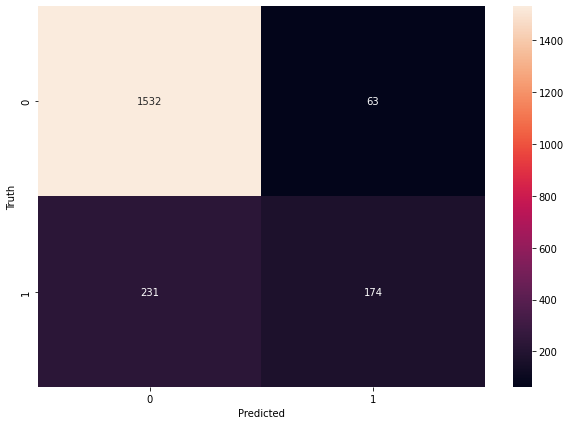

In [40]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy


In [41]:
round((1532+174)/(1532+174+231+63),2)

0.85

Precision for class 0

In [42]:
round(1532/(1532+231),2)

0.87

Precision for class 1

In [44]:
round(174/(174+63),2)

0.73

Recall for class 0

In [46]:
round(1532/(1532+63),2)

0.96

Recall for class 1

In [47]:
round(174/(174+231),2)

0.43